In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


In [27]:
train_df = pd.read_csv("train.csv")
test_df  = pd.read_csv("test.csv")

In [28]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (42000, 785)
Test shape: (28000, 784)


In [29]:
X = train_df.iloc[:, 1:].values   # pixels
y = train_df.iloc[:, 0].values   # labels

X_test_final = test_df.values    

In [30]:
X = X.reshape(X.shape[0], -1)
X_test_final = X_test_final.reshape(X_test_final.shape[0], -1)

print(X.shape)
print(X_test_final.shape)

(42000, 784)
(28000, 784)


In [31]:
X = X / 255.0
X_test_final = X_test_final / 255.0


In [32]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(X_train.shape, X_val.shape)

(33600, 784) (8400, 784)


In [33]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dropout(0.2),

    Dense(10, activation='softmax')
])

c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)


Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8929 - loss: 0.3510 - val_accuracy: 0.9518 - val_loss: 0.1609
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9497 - loss: 0.1637 - val_accuracy: 0.9635 - val_loss: 0.1195
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9598 - loss: 0.1268 - val_accuracy: 0.9680 - val_loss: 0.1007
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9676 - loss: 0.1047 - val_accuracy: 0.9710 - val_loss: 0.0907
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9714 - loss: 0.0911 - val_accuracy: 0.9693 - val_loss: 0.0972
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9749 - loss: 0.0796 - val_accuracy: 0.9717 - val_loss: 0.0971
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9784 - loss: 0.0693 - val_accuracy: 0.9726 - val_loss: 0.0971
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9782 - loss: 0.0670 - 

In [36]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print("Validation Accuracy:", val_accuracy)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9761 - loss: 0.0996
Validation Accuracy: 0.9760714173316956


In [37]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_val, y_pred_classes)
print(cm)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[808   0   1   2   1   1   3   0   0   0]
 [  0 906   1   0   0   0   0   1   1   0]
 [  3   5 820   3   6   1   0   2   4   2]
 [  1   3   4 912   0   7   1   3   5   1]
 [  2   0   0   0 818   1   5   0   0  13]
 [  1   1   0   8   2 679   9   0   1   1]
 [  4   1   1   0   0   2 776   0   1   0]
 [  0   4   5   0   5   1   0 865   3  10]
 [  1   8   4   1   2   7   2   2 806   2]
 [  3   3   0   4   5   4   0   8   2 809]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


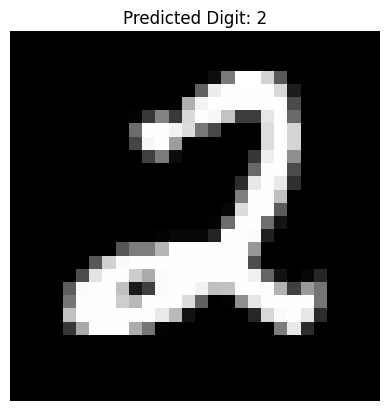

In [41]:
import matplotlib.pyplot as plt

# Pick a random test sample
index = np.random.randint(0, X_test_final.shape[0])

# Predict
prediction = model.predict(X_test_final[index].reshape(1, 784))
predicted_digit = np.argmax(prediction)

# Display image and result
plt.imshow(X_test_final[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()